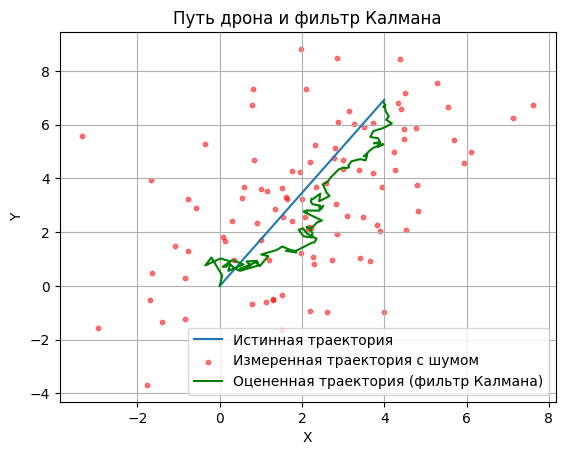

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция фильтра Калмана
def kf(X, F, P, Q, Z, H, R):
    X_prior = F @ X
    P_prior = F @ P @ F.T + Q

    y = Z - H @ X_prior
    S = H @ P_prior @ H.T + R
    K = P_prior @ H.T @ np.linalg.inv(S)

    X_posterior = X_prior + K @ y
    P_posterior = (np.eye(len(X)) - K @ H) @ P_prior

    return X_posterior, P_posterior

# Промежутки времени, через которые снимает дрон
t = np.linspace(0, 8, 100)
delta_t = t[1] - t[0]


F = np.array([[1, 0, delta_t, 0],
              [0, 1, 0, delta_t],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])


Q = np.eye(4) * 0.001

# Заданная скорость и угол
velocity = 1.0  # Линейная скорость дрона
angle = np.radians(60)  # Угол отклонения (в радианах)

# Координаты дрона (истинные)
true_x = [0]
true_y = [0]

for _ in t[1:]:
    true_x.append(true_x[-1] + velocity * np.cos(angle) * delta_t)
    true_y.append(true_y[-1] + velocity * np.sin(angle) * delta_t)

true_x = np.array(true_x)
true_y = np.array(true_y)

# Измеряемое расстояние + шум
R = np.eye(2) * 4
noise = np.random.multivariate_normal([0, 0], R, len(t)).T*0.9
Z = np.array([true_x, true_y]) + noise

# Матрица наблюдений
H = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]])

# Инициализация фильтра Калмана
X_i = np.array([[0],
                [0],
                [velocity * np.cos(angle)],
                [velocity * np.sin(angle)]])
P_i = np.eye(4)

# Вектор для сохранения оценок
estimates_x = [X_i[0, 0]]
estimates_y = [X_i[1, 0]]
# Итерация по фильтру Калмана
for i in range(1, len(t)):
    Z_i = Z[:, i].reshape(2, 1)

    X_i, P_i = kf(X_i, F, P_i, Q, Z_i, H, R)
    estimates_x.append(X_i[0, 0])
    estimates_y.append(X_i[1, 0])

# Построение графика
plt.figure()
plt.plot(true_x, true_y, label='Истинная траектория')
plt.scatter(Z[0], Z[1], label='Измеренная траектория с шумом', color='r', alpha=0.5, s=10)
plt.plot(estimates_x, estimates_y, label='Оцененная траектория (фильтр Калмана)', color='g')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Путь дрона и фильтр Калмана')
plt.grid(True)
plt.show()

In [ ]:
# Функция для нахождения коэффициентов регрессионной прямой
def estimate_coef(x, y):
    n = np.size(x)
    m_x = np.mean(x)
    m_y = np.mean(y)
    SS_xy = np.sum(y * x) - n * m_y * m_x
    SS_xx = np.sum(x * x) - n * m_x * m_x
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x
    return (b_0, b_1)

In [ ]:
estimates_x = np.array(estimates_x)
estimates_y = np.array(estimates_y)

print(f"Коэффициенты при прямой: b0 = {estimate_coef(estimates_x, estimates_y)[0]}, b1 = {estimate_coef(estimates_x, estimates_y)[1]}")

Коэффициенты при прямой: b0 = -0.1993148527979267, b1 = 1.4358291559519492


In [ ]:
def plot_regression_line(x, y, b):
    plt.scatter(x, y, color = "m", marker = "o", s = 30)
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "g")
    plt.xlabel('x')
    plt.ylabel('y')

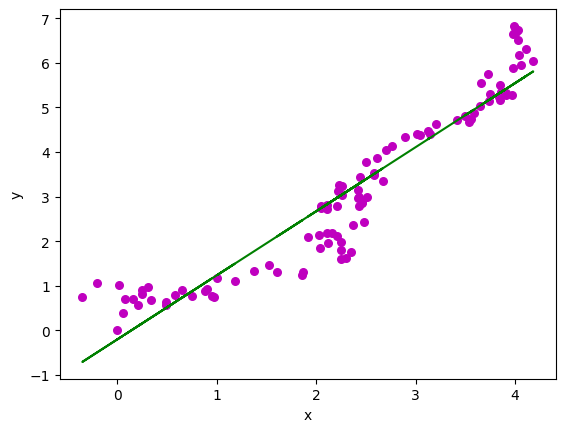

In [ ]:
plot_regression_line(estimates_x, estimates_y, estimate_coef(estimates_x, estimates_y))

In [ ]:
import math
print(f"Искомый угол по версии фильтра составил {math.atan(estimate_coef(estimates_x, estimates_y)[1])*180/math.pi} градуса")

Искомый угол по версии фильтра составил 55.14426666391485 градуса
